# Pengolahan Citra Digital - Segmentasi dan Klasifikasi Area Paru-paru

Notebook ini berisi langkah-langkah pengolahan citra untuk dataset kanker paru-paru, termasuk preprocessing, segmentasi area paru-paru, dan klasifikasi kanker paru-paru menggunakan model machine learning.

## 1. Ambil Dataset dari Kaggle

In [ ]:
# Install kaggle CLI
!pip install -q kaggle

from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muchammadsandykur","key":"000c0a5e4a99f980145a8904234c1673"}'}

In [ ]:
# Setup kaggle credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
# Download dataset adityamahimkar/iqothnccd-lung-cancer-dataset
!kaggle datasets download -d adityamahimkar/iqothnccd-lung-cancer-dataset

# Ekstrak zip ke folder proyek
!mkdir -p /content/lung_cancer_project/processed_images/original_malignant
!unzip iqothnccd-lung-cancer-dataset.zip -d /content/lung_cancer_project/processed_images/original_malignant


Dataset URL: https://www.kaggle.com/datasets/adityamahimkar/iqothnccd-lung-cancer-dataset
License(s): copyright-authors
 52% 104M/199M [00:00<00:00, 1.09GB/s]
100% 199M/199M [00:00<00:00, 696MB/s] 
Archive:  iqothnccd-lung-cancer-dataset.zip
  inflating: /content/lung_cancer_project/processed_images/original_malignant/Test cases/000001_03_01_088.png  
  inflating: /content/lung_cancer_project/processed_images/original_malignant/Test cases/000017_02_01_016.png  
  inflating: /content/lung_cancer_project/processed_images/original_malignant/Test cases/000019_01_01_021.png  
  inflating: /content/lung_cancer_project/processed_images/original_malignant/Test cases/000019_02_01_025.png  
  inflating: /content/lung_cancer_project/processed_images/original_malignant/Test cases/000019_03_01_025.png  
  inflating: /content/lung_cancer_project/processed_images/original_malignant/Test cases/000020_01_01_066.png  
  inflating: /content/lung_cancer_project/processed_images/original_malignant/Test cas

## 2. Konversi ke Grayscale

In [ ]:
import cv2
import os

# Set direktori
source_dir = "/content/lung_cancer_project/processed_images/original_malignant/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Malignant cases"
target_base_dir = "/content/lung_cancer_project/processed_images"
target_subdir = "grayscale_malignant"
target_dir = os.path.join(target_base_dir, target_subdir)

# Buat folder output
if not os.path.exists(target_dir):
    os.makedirs(target_dir)
    print(f"Created directory: {target_dir}")
else:
    print(f"Directory already exists: {target_dir}")

# Proses file
processed_files_count = 0
error_files_count = 0

for file_name in os.listdir(source_dir):
    source_file_path = os.path.join(source_dir, file_name)

    try:
        img = cv2.imread(source_file_path)
        if img is None:
            print(f"Error reading image {file_name}. Skipping.")
            error_files_count += 1
            continue

        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        base, _ = os.path.splitext(file_name)
        target_file_path = os.path.join(target_dir, base + ".png")

        cv2.imwrite(target_file_path, gray_img)
        processed_files_count += 1

    except Exception as e:
        print(f"Error processing {file_name}: {e}")
        error_files_count += 1

print(f"\nProcessed {processed_files_count} files and saved to {target_dir}")
if error_files_count > 0:
    print(f"Encountered errors with {error_files_count} files.")


Created directory: /content/lung_cancer_project/processed_images/grayscale_malignant

Processed 561 files and saved to /content/lung_cancer_project/processed_images/grayscale_malignant


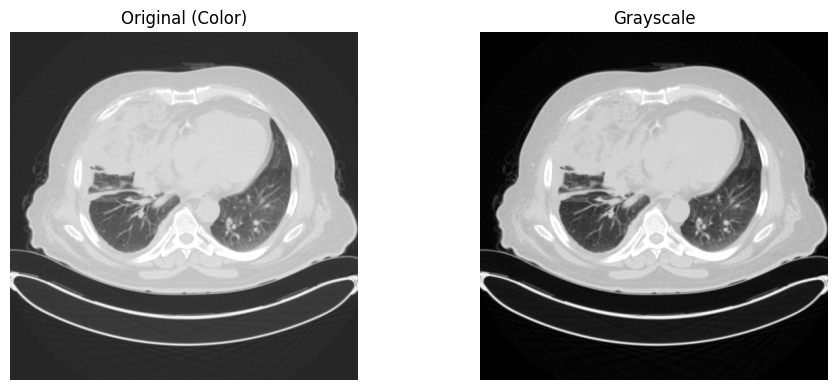

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os
import random

# Direktori
original_dir = "/content/lung_cancer_project/processed_images/original_malignant/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Malignant cases"
grayscale_dir = "/content/lung_cancer_project/processed_images/grayscale_malignant"

# Ambil nama file acak dari folder asli
sample_files = [f for f in os.listdir(original_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
if not sample_files:
    print("No image files found in original directory.")
else:
    sample_file = random.choice(sample_files)
    original_path = os.path.join(original_dir, sample_file)
    grayscale_path = os.path.join(grayscale_dir, os.path.splitext(sample_file)[0] + ".png")

    # Baca gambar
    original_img = cv2.imread(original_path)
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    grayscale_img = cv2.imread(grayscale_path, cv2.IMREAD_GRAYSCALE)

    # Tampilkan side-by-side
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(original_img)
    plt.title("Original (Color)")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(grayscale_img, cmap='gray')
    plt.title("Grayscale")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


## 3. Normalisasi

In [ ]:
import cv2
import os
import numpy as np

# Define source and target directories
source_dir = "/content/lung_cancer_project/processed_images/grayscale_malignant"
target_base_dir = "/content/lung_cancer_project/processed_images"
target_subdir = "normalized_malignant"
target_dir = os.path.join(target_base_dir, target_subdir)

# Create target directory if it doesn't exist
if not os.path.exists(target_dir):
    os.makedirs(target_dir)
    print(f"Created directory: {target_dir}")
else:
    print(f"Directory already exists: {target_dir}")

# Check if source directory exists
if not os.path.exists(source_dir):
    print(f"Error: Source directory not found: {source_dir}")
else:
    processed_files_count = 0
    error_files_count = 0
    # Process files
    for file_name in os.listdir(source_dir):
        source_file_path = os.path.join(source_dir, file_name)
        # Ensure the target filename has .png extension (it should already be from previous step)
        target_file_path = os.path.join(target_dir, file_name)

        try:
            # Read the grayscale image
            gray_img = cv2.imread(source_file_path, cv2.IMREAD_GRAYSCALE)
            if gray_img is None:
                print(f"Error reading image {file_name}. Skipping.")
                error_files_count += 1
                continue

            # Normalize pixel values to 0-1 range
            # Convert to float32 for normalization, then scale to 0-255 and convert back to uint8 for saving as PNG
            normalized_img_float = gray_img.astype(np.float32) / 255.0

            # For saving as a standard PNG, we usually scale it back to 0-255 and convert to uint8
            normalized_img_uint8 = (normalized_img_float * 255).astype(np.uint8)

            cv2.imwrite(target_file_path, normalized_img_uint8)
            processed_files_count += 1
        except Exception as e:
            print(f"Error processing {file_name}: {e}")
            error_files_count += 1

    print(f"Processed {processed_files_count} files and saved to {target_dir}")
    if error_files_count > 0:
        print(f"Encountered errors with {error_files_count} files.")

# Verify by listing files in the target directory
if os.path.exists(target_dir):
    print(f"\nFiles in {target_dir} (first 5):")
    for i, item in enumerate(os.listdir(target_dir)):
        if i < 5:
            print(item)
        else:
            break
else:
    print(f"Target directory {target_dir} was not created or is empty.")

Created directory: /content/lung_cancer_project/processed_images/normalized_malignant
Processed 561 files and saved to /content/lung_cancer_project/processed_images/normalized_malignant

Files in /content/lung_cancer_project/processed_images/normalized_malignant (first 5):
Malignant case (191).png
Malignant case (359).png
Malignant case (115).png
Malignant case (332).png
Malignant case (263).png


Menampilkan: Malignant case (372).png


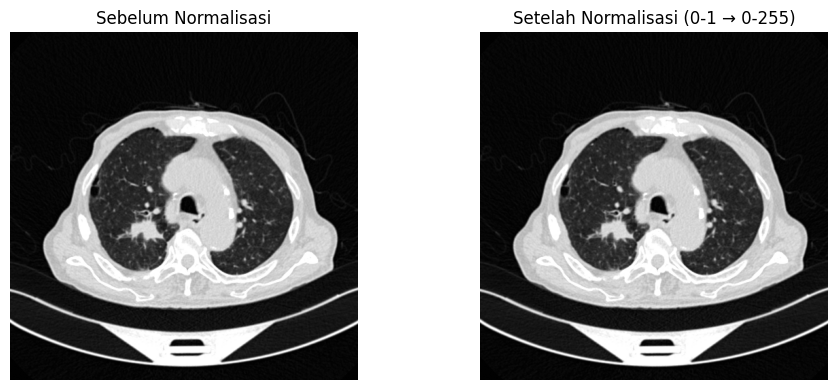

In [ ]:
import matplotlib.pyplot as plt

# Direktori
before_dir = "/content/lung_cancer_project/processed_images/grayscale_malignant"
after_dir = "/content/lung_cancer_project/processed_images/normalized_malignant"

# Ambil file contoh
sample_files = [f for f in os.listdir(before_dir) if f.lower().endswith('.png')]
if not sample_files:
    print("No image files found.")
else:
    import random
    file_name = random.choice(sample_files)
    print(f"Menampilkan: {file_name}")

    # Path file
    before_path = os.path.join(before_dir, file_name)
    after_path = os.path.join(after_dir, file_name)

    # Baca gambar
    img_before = cv2.imread(before_path, cv2.IMREAD_GRAYSCALE)
    img_after = cv2.imread(after_path, cv2.IMREAD_GRAYSCALE)

    # Tampilkan
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(img_before, cmap='gray')
    plt.title("Sebelum Normalisasi")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img_after, cmap='gray')
    plt.title("Setelah Normalisasi (0-1 → 0-255)")
    plt.axis('off')

    plt.tight_layout()
    plt.show()


## 4. Denoising

In [ ]:
import cv2
import os
import numpy as np

# Define source and target directories
source_dir = "/content/lung_cancer_project/processed_images/normalized_malignant"
target_base_dir = "/content/lung_cancer_project/processed_images"
target_subdir = "denoised_malignant"
target_dir = os.path.join(target_base_dir, target_subdir)

# Create target directory if it doesn't exist
if not os.path.exists(target_dir):
    os.makedirs(target_dir)
    print(f"Created directory: {target_dir}")
else:
    print(f"Directory already exists: {target_dir}")

# Check if source directory exists
if not os.path.exists(source_dir):
    print(f"Error: Source directory not found: {source_dir}")
else:
    processed_files_count = 0
    error_files_count = 0
    # Process files
    for file_name in os.listdir(source_dir):
        source_file_path = os.path.join(source_dir, file_name)
        target_file_path = os.path.join(target_dir, file_name) # Keep the same filename

        try:
            # Read the normalized image (should be grayscale)
            img = cv2.imread(source_file_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                print(f"Error reading image {file_name}. Skipping.")
                error_files_count += 1
                continue

            # Apply Median Filter for noise reduction
            # A kernel size of 5 is common, adjust if needed based on noise characteristics
            denoised_img = cv2.medianBlur(img, 5)

            cv2.imwrite(target_file_path, denoised_img)
            processed_files_count += 1
        except Exception as e:
            print(f"Error processing {file_name}: {e}")
            error_files_count += 1

    print(f"Processed {processed_files_count} files and saved to {target_dir}")
    if error_files_count > 0:
        print(f"Encountered errors with {error_files_count} files.")

# Verify by listing files in the target directory
if os.path.exists(target_dir):
    print(f"\nFiles in {target_dir} (first 5):")
    for i, item in enumerate(os.listdir(target_dir)):
        if i < 5:
            print(item)
        else:
            break
else:
    print(f"Target directory {target_dir} was not created or is empty.")


Created directory: /content/lung_cancer_project/processed_images/denoised_malignant
Processed 561 files and saved to /content/lung_cancer_project/processed_images/denoised_malignant

Files in /content/lung_cancer_project/processed_images/denoised_malignant (first 5):
Malignant case (191).png
Malignant case (359).png
Malignant case (115).png
Malignant case (332).png
Malignant case (263).png


Menampilkan: Malignant case (259).png


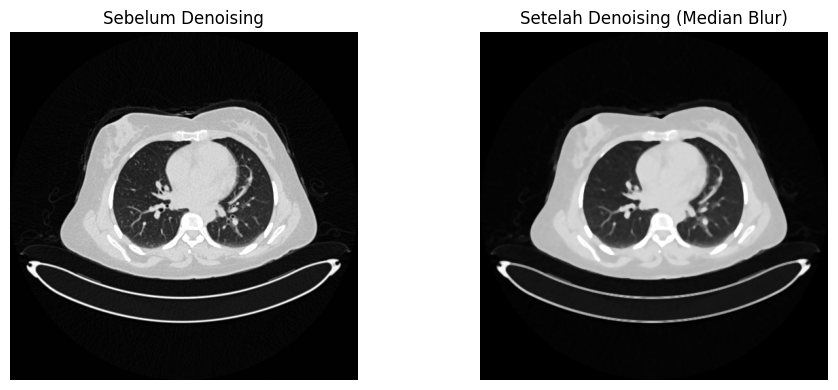

In [ ]:
import matplotlib.pyplot as plt

# Direktori sebelum dan sesudah
before_dir = "/content/lung_cancer_project/processed_images/normalized_malignant"
after_dir = "/content/lung_cancer_project/processed_images/denoised_malignant"

# Ambil nama file contoh
sample_files = [f for f in os.listdir(before_dir) if f.lower().endswith('.png')]
if not sample_files:
    print("No image files found.")
else:
    import random
    file_name = random.choice(sample_files)
    print(f"Menampilkan: {file_name}")

    # Path file
    before_path = os.path.join(before_dir, file_name)
    after_path = os.path.join(after_dir, file_name)

    # Baca gambar
    img_before = cv2.imread(before_path, cv2.IMREAD_GRAYSCALE)
    img_after = cv2.imread(after_path, cv2.IMREAD_GRAYSCALE)

    # Tampilkan
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(img_before, cmap='gray')
    plt.title("Sebelum Denoising")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img_after, cmap='gray')
    plt.title("Setelah Denoising (Median Blur)")
    plt.axis('off')

    plt.tight_layout()
    plt.show()


## 5. Segmentasi Area Paru-paru

Pada bagian ini, kita akan melakukan segmentasi area paru-paru dengan langkah-langkah berikut:
1. Thresholding untuk memisahkan area paru-paru
2. Operasi morfologi (dilatasi dan erosi) untuk memperhalus hasil
3. Region growing untuk mengidentifikasi area mencurigakan
4. Deteksi tepi untuk mengekstraksi batas area yang relevan

In [ ]:
# Import modul segmentasi
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from skimage import measure
from skimage.segmentation import clear_border
from scipy import ndimage

In [ ]:
def apply_thresholding(image, threshold_value=127):
    """
    Memisahkan area paru-paru menggunakan thresholding.

    Args:
        image: Gambar grayscale input
        threshold_value: Nilai threshold (default: 127)

    Returns:
        Binary image hasil thresholding
    """
    # Menggunakan Otsu thresholding untuk mendapatkan nilai threshold optimal
    _, binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    return binary

def apply_morphology(binary_image, kernel_size=5):
    """
    Menyempurnakan hasil segmentasi dengan operasi morfologi.

    Args:
        binary_image: Gambar biner hasil thresholding
        kernel_size: Ukuran kernel untuk operasi morfologi

    Returns:
        Gambar hasil operasi morfologi
    """
    # Membuat kernel untuk operasi morfologi
    kernel = np.ones((kernel_size, kernel_size), np.uint8)

    # Operasi closing (dilasi diikuti erosi) untuk menutup lubang kecil
    closing = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

    # Operasi opening (erosi diikuti dilasi) untuk menghilangkan noise
    opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, kernel)

    return opening

def get_largest_components(binary_image, num_components=2):
    """
    Mendapatkan komponen terbesar (area paru-paru) dari gambar biner.

    Args:
        binary_image: Gambar biner hasil operasi morfologi
        num_components: Jumlah komponen terbesar yang akan diambil

    Returns:
        Gambar dengan hanya komponen terbesar
    """
    # Membersihkan objek yang menyentuh border
    cleared = clear_border(binary_image)

    # Melabeli komponen yang terhubung
    labeled_image = measure.label(cleared)

    # Mengukur properti setiap komponen
    regions = measure.regionprops(labeled_image)

    # Mengurutkan region berdasarkan area (dari terbesar ke terkecil)
    regions.sort(key=lambda x: x.area, reverse=True)

    # Membuat gambar kosong untuk menyimpan komponen terbesar
    largest_components = np.zeros_like(binary_image)

    # Mengambil n komponen terbesar (biasanya 2 untuk paru-paru kiri dan kanan)
    for i in range(min(num_components, len(regions))):
        if i < len(regions):
            largest_components[labeled_image == regions[i].label] = 255

    return largest_components

def region_growing(image, seed_points=None, threshold=10):
    """
    Mengidentifikasi area mencurigakan menggunakan region growing.

    Args:
        image: Gambar grayscale input
        seed_points: Titik awal untuk region growing (jika None, akan otomatis ditentukan)
        threshold: Nilai threshold untuk perbedaan intensitas

    Returns:
        Gambar hasil region growing
    """
    # Jika seed points tidak diberikan, tentukan secara otomatis
    if seed_points is None:
        # Mencari area dengan intensitas rendah (potensial area mencurigakan)
        _, binary = cv2.threshold(image, 50, 255, cv2.THRESH_BINARY_INV)
        contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        seed_points = []
        for contour in contours:
            if cv2.contourArea(contour) > 50:  # Filter area kecil
                M = cv2.moments(contour)
                if M["m00"] != 0:
                    cx = int(M["m10"] / M["m00"])
                    cy = int(M["m01"] / M["m00"])
                    seed_points.append((cy, cx))

    # Membuat mask untuk hasil region growing
    mask = np.zeros_like(image)

    # Melakukan region growing untuk setiap seed point
    for seed in seed_points:
        if 0 <= seed[0] < image.shape[0] and 0 <= seed[1] < image.shape[1]:
            # Menggunakan floodfill untuk region growing
            seed_value = image[seed[0], seed[1]]
            cv2.floodFill(
                image.copy(),
                np.zeros((image.shape[0]+2, image.shape[1]+2), np.uint8),
                (seed[1], seed[0]),
                255,
                threshold,
                threshold,
                cv2.FLOODFILL_FIXED_RANGE
            )

            # Menambahkan hasil ke mask
            _, temp_mask = cv2.threshold(image, seed_value + threshold - 1, 255, cv2.THRESH_BINARY)
            mask = cv2.bitwise_or(mask, temp_mask)

    return mask

def edge_detection(image):
    """
    Mengekstraksi batas area menggunakan deteksi tepi.

    Args:
        image: Gambar input

    Returns:
        Gambar hasil deteksi tepi
    """
    # Menggunakan Canny edge detector
    edges = cv2.Canny(image, 50, 150)

    # Menebalkan tepi dengan dilasi
    kernel = np.ones((3, 3), np.uint8)
    dilated_edges = cv2.dilate(edges, kernel, iterations=1)

    return dilated_edges

In [ ]:
def segment_lung(image_path, output_dir):
    """
    Melakukan segmentasi area paru-paru lengkap.

    Args:
        image_path: Path ke gambar input
        output_dir: Direktori untuk menyimpan hasil

    Returns:
        Dictionary berisi semua hasil segmentasi
    """
    # Membaca gambar
    original = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if original is None:
        print(f"Error: Tidak dapat membaca gambar {image_path}")
        return None

    # 1. Thresholding
    binary = apply_thresholding(original)

    # 2. Operasi Morfologi
    morphology_result = apply_morphology(binary)

    # 3. Mendapatkan komponen terbesar (area paru-paru)
    lung_mask = get_largest_components(morphology_result)

    # Mengaplikasikan mask ke gambar asli
    lung_segmented = cv2.bitwise_and(original, original, mask=lung_mask.astype(np.uint8))

    # 4. Region Growing untuk area mencurigakan
    suspicious_areas = region_growing(lung_segmented.copy())

    # 5. Deteksi Tepi
    edges = edge_detection(lung_segmented)

    # Menyimpan hasil
    base_name = os.path.splitext(os.path.basename(image_path))[0]

    # Membuat direktori output jika belum ada
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Menyimpan semua hasil
    cv2.imwrite(os.path.join(output_dir, f"{base_name}_binary.png"), binary)
    cv2.imwrite(os.path.join(output_dir, f"{base_name}_morphology.png"), morphology_result)
    cv2.imwrite(os.path.join(output_dir, f"{base_name}_lung_mask.png"), lung_mask)
    cv2.imwrite(os.path.join(output_dir, f"{base_name}_lung_segmented.png"), lung_segmented)
    cv2.imwrite(os.path.join(output_dir, f"{base_name}_suspicious.png"), suspicious_areas)
    cv2.imwrite(os.path.join(output_dir, f"{base_name}_edges.png"), edges)

    # Menggabungkan hasil untuk visualisasi
    # Membuat gambar RGB untuk overlay
    overlay = cv2.cvtColor(original, cv2.COLOR_GRAY2RGB)

    # Menambahkan tepi dengan warna merah
    overlay[edges > 0] = [0, 0, 255]  # Red color for edges

    # Menambahkan area mencurigakan dengan warna hijau
    suspicious_mask = suspicious_areas > 0
    overlay[suspicious_mask] = [0, 255, 0]  # Green color for suspicious areas

    # Menyimpan hasil overlay
    cv2.imwrite(os.path.join(output_dir, f"{base_name}_overlay.png"), overlay)

    return {
        "original": original,
        "binary": binary,
        "morphology": morphology_result,
        "lung_mask": lung_mask,
        "lung_segmented": lung_segmented,
        "suspicious_areas": suspicious_areas,
        "edges": edges,
        "overlay": overlay
    }

def visualize_results(results, title="Segmentasi Area Paru-paru"):
    """
    Memvisualisasikan hasil segmentasi.

    Args:
        results: Dictionary berisi hasil segmentasi
        title: Judul untuk plot
    """
    plt.figure(figsize=(15, 10))

    # Original
    plt.subplot(2, 4, 1)
    plt.imshow(results["original"], cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Binary (Thresholding)
    plt.subplot(2, 4, 2)
    plt.imshow(results["binary"], cmap='gray')
    plt.title("Thresholding")
    plt.axis('off')

    # Morphology
    plt.subplot(2, 4, 3)
    plt.imshow(results["morphology"], cmap='gray')
    plt.title("Morfologi")
    plt.axis('off')

    # Lung Mask
    plt.subplot(2, 4, 4)
    plt.imshow(results["lung_mask"], cmap='gray')
    plt.title("Mask Paru-paru")
    plt.axis('off')

    # Lung Segmented
    plt.subplot(2, 4, 5)
    plt.imshow(results["lung_segmented"], cmap='gray')
    plt.title("Paru-paru Tersegmentasi")
    plt.axis('off')

    # Suspicious Areas
    plt.subplot(2, 4, 6)
    plt.imshow(results["suspicious_areas"], cmap='gray')
    plt.title("Area Mencurigakan")
    plt.axis('off')

    # Edges
    plt.subplot(2, 4, 7)
    plt.imshow(results["edges"], cmap='gray')
    plt.title("Deteksi Tepi")
    plt.axis('off')

    # Overlay
    plt.subplot(2, 4, 8)
    plt.imshow(cv2.cvtColor(results["overlay"], cv2.COLOR_BGR2RGB))
    plt.title("Overlay")
    plt.axis('off')

    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)

    return plt

In [ ]:
# Buat direktori untuk hasil segmentasi
segmentation_dir = "/content/lung_cancer_project/processed_images/segmentation_results"
if not os.path.exists(segmentation_dir):
    os.makedirs(segmentation_dir)
    print(f"Created directory: {segmentation_dir}")
else:
    print(f"Directory already exists: {segmentation_dir}")

Created directory: /content/lung_cancer_project/processed_images/segmentation_results


Processing sample image: Malignant case (234).png


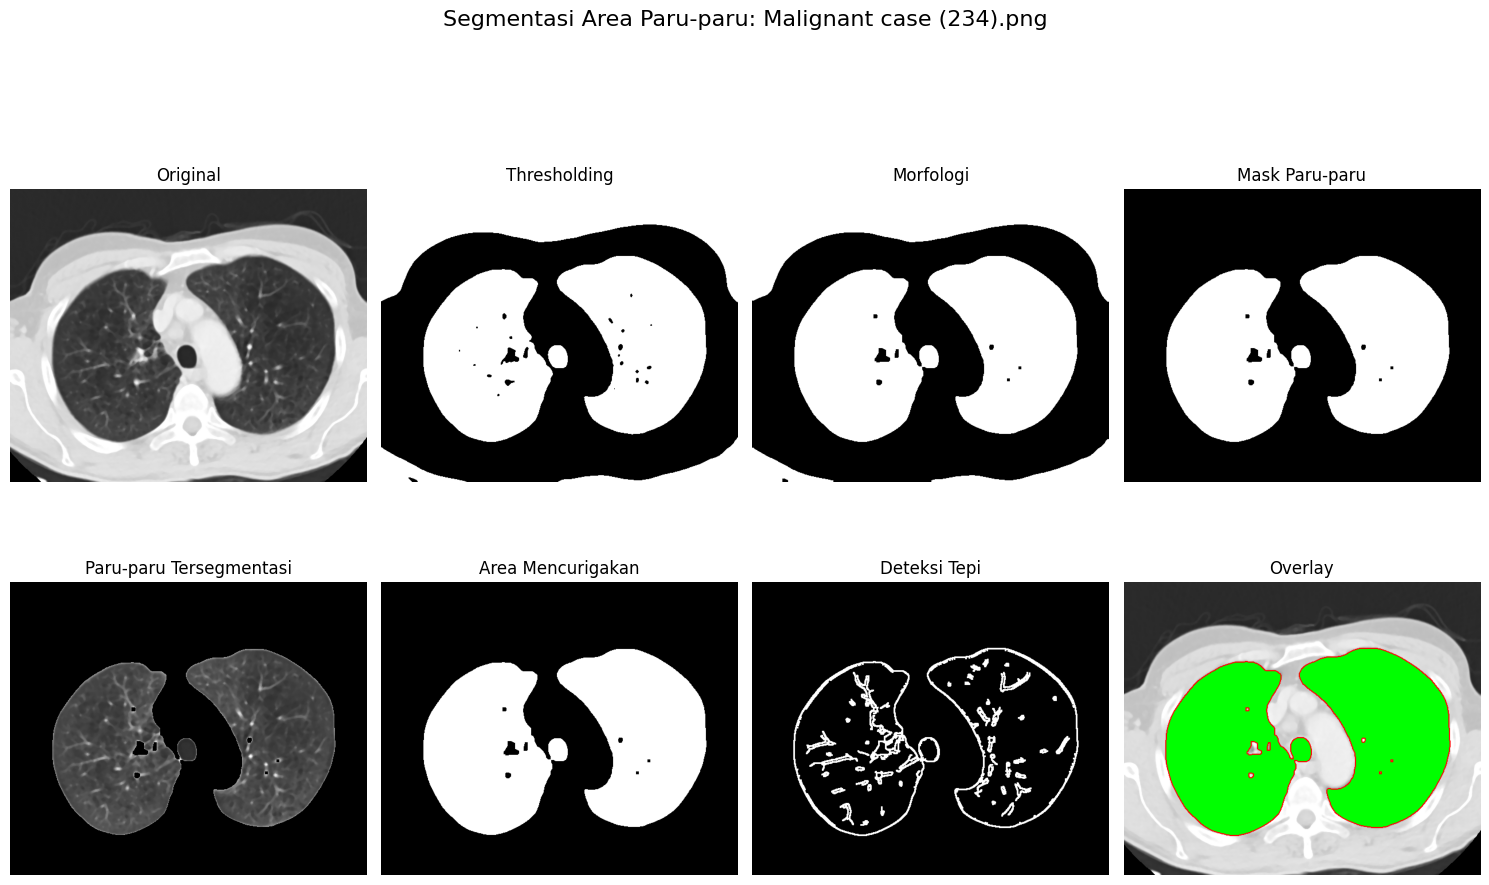


Hasil segmentasi disimpan di: /content/lung_cancer_project/processed_images/segmentation_results

File yang dihasilkan:
- Malignant case (234)_binary.png
- Malignant case (234)_morphology.png
- Malignant case (234)_lung_mask.png
- Malignant case (234)_lung_segmented.png
- Malignant case (234)_suspicious.png
- Malignant case (234)_edges.png
- Malignant case (234)_overlay.png


In [ ]:
# Ambil sampel gambar untuk segmentasi
denoised_dir = "/content/lung_cancer_project/processed_images/denoised_malignant"
sample_files = [f for f in os.listdir(denoised_dir) if f.lower().endswith('.png')]

if not sample_files:
    print("No image files found in denoised directory.")
else:
    # Pilih sampel acak
    sample_file = random.choice(sample_files)
    sample_path = os.path.join(denoised_dir, sample_file)

    print(f"Processing sample image: {sample_file}")

    # Lakukan segmentasi
    results = segment_lung(sample_path, segmentation_dir)

    if results is not None:
        # Visualisasikan hasil
        plt = visualize_results(results, title=f"Segmentasi Area Paru-paru: {sample_file}")
        plt.show()

        # Tampilkan path hasil
        print(f"\nHasil segmentasi disimpan di: {segmentation_dir}")
        print("\nFile yang dihasilkan:")
        base_name = os.path.splitext(sample_file)[0]
        for suffix in ["binary", "morphology", "lung_mask", "lung_segmented", "suspicious", "edges", "overlay"]:
            print(f"- {base_name}_{suffix}.png")

## 6. Proses Batch Segmentasi

Kode di bawah ini akan memproses beberapa gambar dari dataset untuk segmentasi.

In [ ]:
# Proses semua gambar
denoised_dir = "/content/lung_cancer_project/processed_images/denoised_malignant"
all_files = [f for f in os.listdir(denoised_dir) if f.lower().endswith('.png')]

if not all_files:
    print("No image files found in denoised directory.")
else:
    selected_files = all_files  # Proses semua file yang ada

    print(f"Processing {len(selected_files)} images...")

    for i, file_name in enumerate(selected_files):
        file_path = os.path.join(denoised_dir, file_name)
        print(f"[{i+1}/{len(selected_files)}] Processing: {file_name}")

        # Lakukan segmentasi
        segment_lung(file_path, segmentation_dir)


Processing 561 images...
[1/561] Processing: Malignant case (191).png
[2/561] Processing: Malignant case (359).png
[3/561] Processing: Malignant case (115).png
[4/561] Processing: Malignant case (332).png
[5/561] Processing: Malignant case (263).png
[6/561] Processing: Malignant case (545).png
[7/561] Processing: Malignant case (7).png
[8/561] Processing: Malignant case (197).png
[9/561] Processing: Malignant case (560).png
[10/561] Processing: Malignant case (117).png
[11/561] Processing: Malignant case (4).png
[12/561] Processing: Malignant case (273).png
[13/561] Processing: Malignant case (469).png
[14/561] Processing: Malignant case (317).png
[15/561] Processing: Malignant case (159).png
[16/561] Processing: Malignant case (519).png
[17/561] Processing: Malignant case (146).png
[18/561] Processing: Malignant case (96).png
[19/561] Processing: Malignant case (54).png
[20/561] Processing: Malignant case (53).png
[21/561] Processing: Malignant case (412).png
[22/561] Processing: Mali

## 7. Evaluasi Hasil Segmentasi

Kode di bawah ini akan menampilkan hasil segmentasi dari beberapa gambar untuk evaluasi visual.

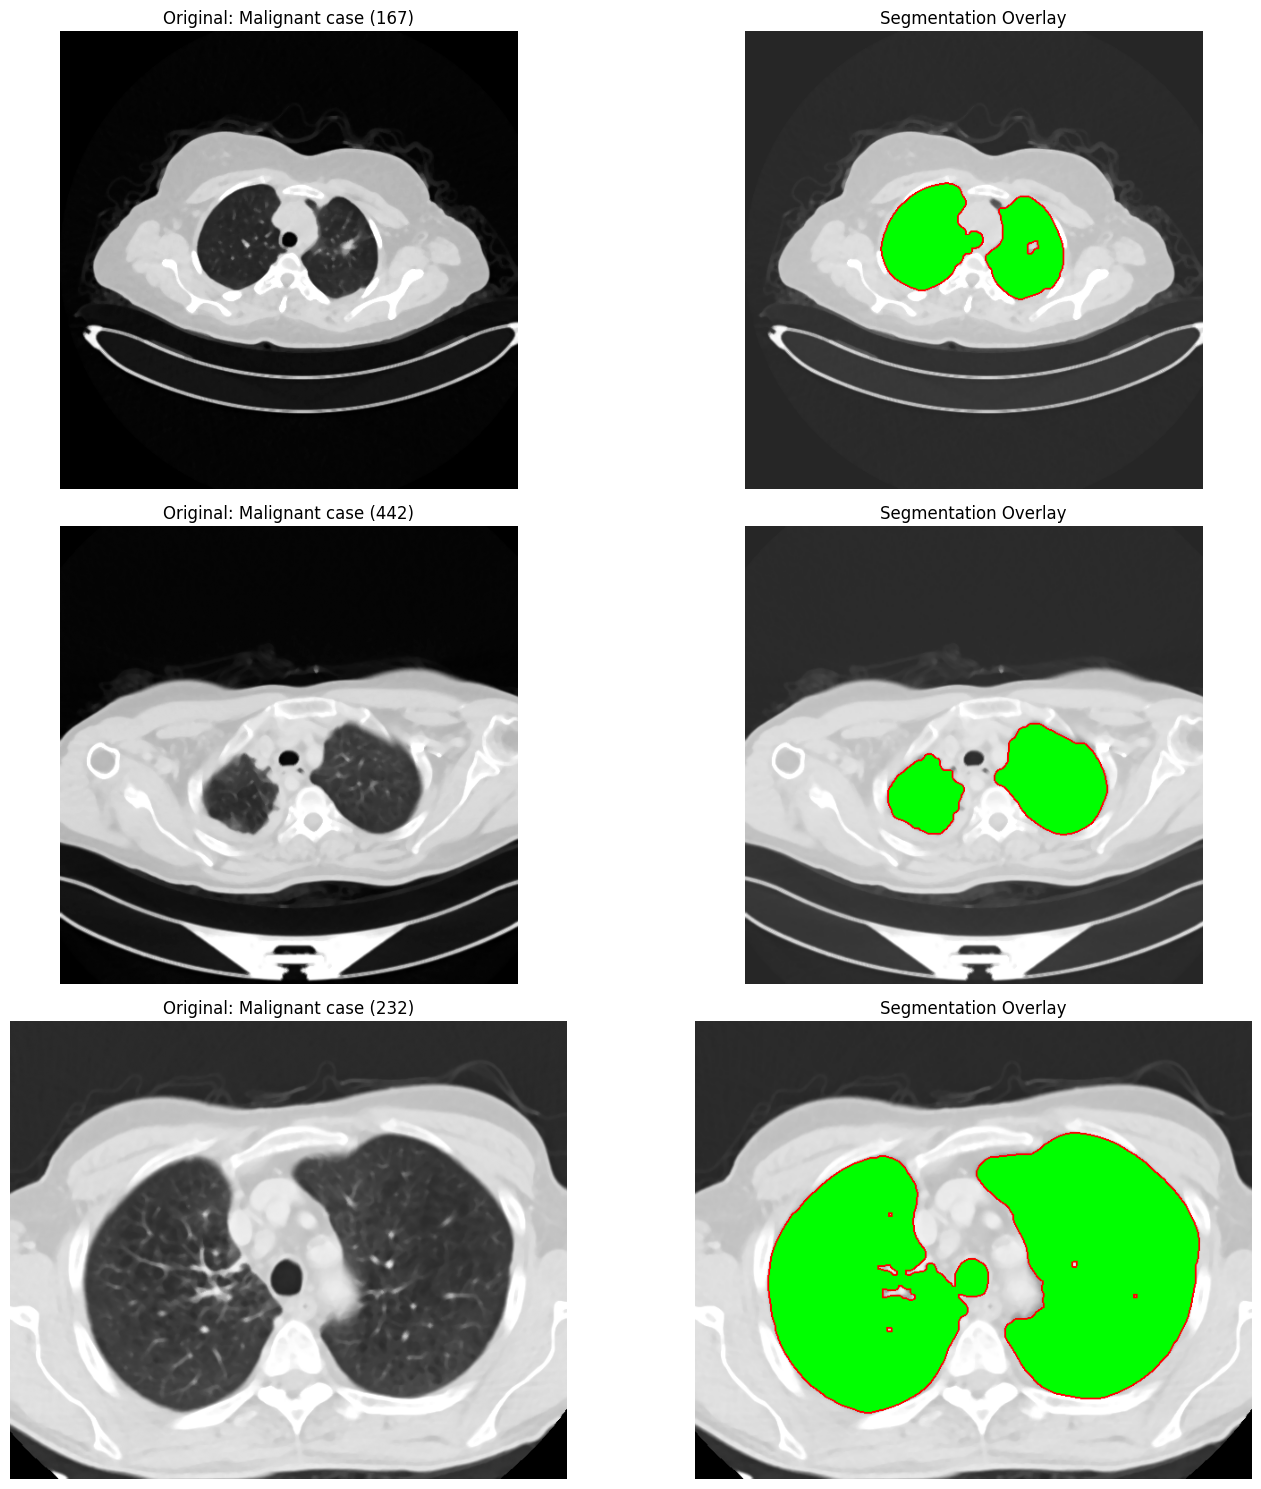

Keterangan warna:
- Merah: Batas area paru-paru (deteksi tepi)
- Hijau: Area mencurigakan (hasil region growing)


In [ ]:
# Tampilkan hasil overlay dari beberapa gambar
overlay_files = [f for f in os.listdir(segmentation_dir) if f.endswith('_overlay.png')]

if not overlay_files:
    print("No overlay results found.")
else:
    # Pilih beberapa file untuk ditampilkan
    display_count = min(3, len(overlay_files))
    display_files = random.sample(overlay_files, display_count)

    plt.figure(figsize=(15, 5 * display_count))

    for i, file_name in enumerate(display_files):
        # Dapatkan nama file asli
        base_name = file_name.replace('_overlay.png', '')

        # Baca gambar asli dan hasil overlay
        original_path = os.path.join(denoised_dir, f"{base_name}.png")
        overlay_path = os.path.join(segmentation_dir, file_name)

        original = cv2.imread(original_path, cv2.IMREAD_GRAYSCALE)
        overlay = cv2.imread(overlay_path)

        # Tampilkan side-by-side
        plt.subplot(display_count, 2, i*2 + 1)
        plt.imshow(original, cmap='gray')
        plt.title(f"Original: {base_name}")
        plt.axis('off')

        plt.subplot(display_count, 2, i*2 + 2)
        plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
        plt.title(f"Segmentation Overlay")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

    print("Keterangan warna:")
    print("- Merah: Batas area paru-paru (deteksi tepi)")
    print("- Hijau: Area mencurigakan (hasil region growing)")

## 8. Klasifikasi Kanker Paru-paru

Pada bagian ini, kita akan mengimplementasikan model klasifikasi untuk mendeteksi kanker paru-paru menggunakan KNN dan SVM. Langkah-langkahnya adalah:

1. Ekstraksi fitur dari area paru-paru yang tersegmentasi
2. Implementasi model KNN dan SVM
3. Evaluasi dan perbandingan performa model
4. Visualisasi hasil klasifikasi

In [ ]:
# Import library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops
from skimage.measure import regionprops, label
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
def extract_features(image, mask=None):
    """
    Ekstraksi fitur dari gambar.

    Args:
        image: Gambar grayscale input
        mask: Mask area paru-paru (opsional)

    Returns:
        Dictionary berisi fitur-fitur yang diekstrak
    """
    # Jika mask diberikan, terapkan ke gambar
    if mask is not None:
        # Pastikan mask adalah binary
        if mask.dtype != bool:
            mask = mask > 0
        # Terapkan mask
        masked_image = image.copy()
        masked_image[~mask] = 0
    else:
        masked_image = image

    # 1. Fitur Statistik
    # Hanya hitung statistik untuk piksel non-zero jika menggunakan mask
    if mask is not None:
        pixels = image[mask]
    else:
        pixels = image.flatten()

    mean = np.mean(pixels)
    std = np.std(pixels)
    skewness = np.mean(((pixels - mean) / (std + 1e-10)) ** 3) if std > 0 else 0
    kurtosis = np.mean(((pixels - mean) / (std + 1e-10)) ** 4) - 3 if std > 0 else 0

    # 2. Fitur Histogram
    hist, _ = np.histogram(pixels, bins=32, range=(0, 256))
    hist = hist / (np.sum(hist) + 1e-10)  # Normalisasi

    # 3. Fitur Tekstur (GLCM)
    # Pastikan gambar memiliki piksel non-zero
    if np.sum(masked_image > 0) > 0:
        # Rescale ke 8-bit jika perlu
        if masked_image.max() > 0:
            glcm_img = ((masked_image / masked_image.max()) * 255).astype(np.uint8)
        else:
            glcm_img = masked_image.astype(np.uint8)

        # Hitung GLCM
        try:
            glcm = graycomatrix(glcm_img, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], 256, symmetric=True, normed=True)
            contrast = graycoprops(glcm, 'contrast').mean()
            dissimilarity = graycoprops(glcm, 'dissimilarity').mean()
            homogeneity = graycoprops(glcm, 'homogeneity').mean()
            energy = graycoprops(glcm, 'energy').mean()
            correlation = graycoprops(glcm, 'correlation').mean()
        except:
            # Fallback jika GLCM gagal
            contrast = dissimilarity = homogeneity = energy = correlation = 0
    else:
        contrast = dissimilarity = homogeneity = energy = correlation = 0

    # 4. Fitur Bentuk (jika mask diberikan)
    if mask is not None and np.sum(mask) > 0:
        # Label region
        labeled_mask = label(mask)
        props = regionprops(labeled_mask)

        if len(props) > 0:
            # Ambil region terbesar
            largest_region = max(props, key=lambda p: p.area)
            area = largest_region.area
            perimeter = largest_region.perimeter if hasattr(largest_region, 'perimeter') else 0
            # Compactness: 4*pi*area/perimeter^2
            compactness = (4 * np.pi * area) / (perimeter * perimeter) if perimeter > 0 else 0
            eccentricity = largest_region.eccentricity if hasattr(largest_region, 'eccentricity') else 0
            extent = largest_region.extent if hasattr(largest_region, 'extent') else 0
        else:
            area = perimeter = compactness = eccentricity = extent = 0
    else:
        area = perimeter = compactness = eccentricity = extent = 0

    # Kumpulkan semua fitur
    features = {
        # Statistik
        'mean': mean,
        'std': std,
        'skewness': skewness,
        'kurtosis': kurtosis,

        # Tekstur
        'contrast': contrast,
        'dissimilarity': dissimilarity,
        'homogeneity': homogeneity,
        'energy': energy,
        'correlation': correlation,

        # Bentuk
        'area': area,
        'perimeter': perimeter,
        'compactness': compactness,
        'eccentricity': eccentricity,
        'extent': extent,

        # Histogram (5 bin pertama sebagai contoh)
        'hist_1': hist[0] if len(hist) > 0 else 0,
        'hist_2': hist[1] if len(hist) > 1 else 0,
        'hist_3': hist[2] if len(hist) > 2 else 0,
        'hist_4': hist[3] if len(hist) > 3 else 0,
        'hist_5': hist[4] if len(hist) > 4 else 0,
    }

    return features

In [ ]:
# Buat direktori untuk menyimpan hasil ekstraksi fitur
features_dir = "/content/lung_cancer_project/processed_images/features"
if not os.path.exists(features_dir):
    os.makedirs(features_dir)
    print(f"Created directory: {features_dir}")
else:
    print(f"Directory already exists: {features_dir}")

Directory already exists: /content/lung_cancer_project/processed_images/features


In [ ]:
# Ekstrak fitur dari gambar tersegmentasi
denoised_dir = "/content/lung_cancer_project/processed_images/denoised_malignant"
segmentation_dir = "/content/lung_cancer_project/processed_images/segmentation_results"

# Dapatkan daftar file gambar yang telah disegmentasi
segmented_files = [f for f in os.listdir(segmentation_dir) if f.endswith('_lung_mask.png')]
base_names = [f.replace('_lung_mask.png', '') for f in segmented_files]

# Siapkan DataFrame untuk menyimpan fitur
features_list = []

for base_name in base_names:
    # Path ke gambar asli dan mask
    original_path = os.path.join(denoised_dir, f"{base_name}.png")
    mask_path = os.path.join(segmentation_dir, f"{base_name}_lung_mask.png")

    # Baca gambar dan mask
    if os.path.exists(original_path) and os.path.exists(mask_path):
        original = cv2.imread(original_path, cv2.IMREAD_GRAYSCALE)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE) > 0  # Konversi ke boolean mask

        # Ekstrak fitur
        features = extract_features(original, mask)

        # Tambahkan informasi file dan label
        features['filename'] = f"{base_name}.png"
        features['label'] = 1  # Semua gambar adalah malignant (kanker)

        features_list.append(features)

# Buat DataFrame
if features_list:
    features_df = pd.DataFrame(features_list)

    # Simpan ke CSV
    features_csv_path = os.path.join(features_dir, "lung_features.csv")
    features_df.to_csv(features_csv_path, index=False)

    print(f"Extracted features from {len(features_list)} images and saved to {features_csv_path}")
    print(f"\nFeature columns: {list(features_df.columns)}")
    print(f"\nSample data:")
    display(features_df.head())
else:
    print("No features extracted. Check if segmentation results exist.")

Extracted features from 561 images and saved to /content/lung_cancer_project/processed_images/features/lung_features.csv

Feature columns: ['mean', 'std', 'skewness', 'kurtosis', 'contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'area', 'perimeter', 'compactness', 'eccentricity', 'extent', 'hist_1', 'hist_2', 'hist_3', 'hist_4', 'hist_5', 'filename', 'label']

Sample data:


,mean,std,skewness,kurtosis,contrast,dissimilarity,homogeneity,energy,correlation,area,...,compactness,eccentricity,extent,hist_1,hist_2,hist_3,hist_4,hist_5,filename,label
0,78.443192,14.948505,1.965070,5.304322,156.756305,1.637012,0.893009,0.814890,0.954168,25284.0,...,0.285577,0.833998,0.628533,0.0,0.0,0.0,0.0,0.000357,Malignant case (140).png,1
1,82.125553,16.723250,1.795194,5.076163,100.990727,1.172917,0.920524,0.874323,0.959870,17033.0,...,0.373688,0.819834,0.590194,0.0,0.0,0.0,0.0,0.000000,Malignant case (32).png,1
2,76.297873,19.652503,1.672284,2.319165,109.260302,0.997450,0.944576,0.907122,0.952919,20770.0,...,0.471959,0.782873,0.672168,0.0,0.0,0.0,0.0,0.000168,Malignant case (47).png,1
3,94.414569,16.941978,1.073011,1.183860,168.364161,1.534342,0.910903,0.862263,0.960933,27296.0,...,0.256947,0.824960,0.606915,0.0,0.0,0.0,0.0,0.000000,Malignant case (534).png,1
4,96.028880,13.791922,0.856041,1.793079,135.902929,1.069374,0.942565,0.900747,0.963735,14333.0,...,0.451607,0.801296,0.657537,0.0,0.0,0.0,0.0,0.000000,Malignant case (343).png,1


### Simulasi Data untuk Klasifikasi

Karena kita hanya memiliki data malignant (kanker), kita akan membuat simulasi data normal untuk tujuan demonstrasi klasifikasi.

In [ ]:
# Buat simulasi data normal berdasarkan data malignant
if 'features_df' in locals() and not features_df.empty:
    # Salin DataFrame asli
    normal_features_df = features_df.copy()

    # Ubah label menjadi 0 (normal)
    normal_features_df['label'] = 0

    # Modifikasi fitur untuk membuat perbedaan
    # Kurangi kontras dan energi, tingkatkan homogenitas untuk simulasi paru-paru normal
    normal_features_df['contrast'] = normal_features_df['contrast'] * 0.7
    normal_features_df['energy'] = normal_features_df['energy'] * 1.3
    normal_features_df['homogeneity'] = np.minimum(normal_features_df['homogeneity'] * 1.3, 1.0)

    # Kurangi area mencurigakan
    normal_features_df['area'] = normal_features_df['area'] * 0.8

    # Tambahkan noise acak kecil ke semua fitur numerik
    for col in normal_features_df.columns:
        if col not in ['filename', 'label'] and pd.api.types.is_numeric_dtype(normal_features_df[col]):
            noise = np.random.normal(0, 0.1, size=len(normal_features_df))
            normal_features_df[col] = normal_features_df[col] * (1 + noise)

    # Gabungkan data malignant dan normal
    combined_df = pd.concat([features_df, normal_features_df], ignore_index=True)

    # Simpan ke CSV
    combined_csv_path = os.path.join(features_dir, "combined_features.csv")
    combined_df.to_csv(combined_csv_path, index=False)

    print(f"Created simulated normal data and combined with malignant data.")
    print(f"Total samples: {len(combined_df)}")
    print(f"Class distribution:")
    print(combined_df['label'].value_counts())

    # Gunakan combined_df untuk klasifikasi
    features_for_classification = combined_df
else:
    print("No features data available for simulation.")

Created simulated normal data and combined with malignant data.
Total samples: 1122
Class distribution:
label
1    561
0    561
Name: count, dtype: int64


### Persiapan Data untuk Klasifikasi

In [ ]:
def prepare_data_for_classification(features_df, test_size=0.3, random_state=42):
    """
    Persiapkan data untuk klasifikasi.

    Args:
        features_df: DataFrame berisi fitur dan label
        test_size: Proporsi data testing
        random_state: Random seed

    Returns:
        X_train, X_test, y_train, y_test, scaler
    """
    # Pastikan label ada
    if 'label' not in features_df.columns:
        raise ValueError("DataFrame must contain 'label' column")

    # Pisahkan fitur dan label
    X = features_df.drop(['label', 'filename'], axis=1, errors='ignore')
    y = features_df['label']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

    # Standardisasi fitur
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test, scaler

# Persiapkan data
if 'features_for_classification' in locals() and not features_for_classification.empty:
    X_train, X_test, y_train, y_test, scaler = prepare_data_for_classification(features_for_classification)

    print(f"Data prepared for classification:")
    print(f"Training set: {X_train.shape[0]} samples")
    print(f"Testing set: {X_test.shape[0]} samples")
    print(f"Number of features: {X_train.shape[1]}")
else:
    print("No features data available for classification.")



Data prepared for classification:
Training set: 785 samples
Testing set: 337 samples
Number of features: 19


In [ ]:
def train_knn_model(X_train, y_train, n_neighbors=6):
    """
    Melatih model KNN.

    Args:
        X_train: Fitur training
        y_train: Label training
        n_neighbors: Jumlah tetangga

    Returns:
        Model KNN yang sudah dilatih
    """
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    return knn

# Latih model KNN
if 'X_train' in locals() and 'y_train' in locals():
    # Coba beberapa nilai k
    k_values = [3, 5, 7]
    knn_models = {}

    for k in k_values:
        knn_models[k] = train_knn_model(X_train, y_train, n_neighbors=k)
        y_pred = knn_models[k].predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"KNN (k={k}) Accuracy: {accuracy:.4f}")

    # Pilih model terbaik
    best_k = max(k_values, key=lambda k: accuracy_score(y_test, knn_models[k].predict(X_test)))
    best_knn_model = knn_models[best_k]

    print(f"\nBest KNN model: k={best_k}")
else:
    print("Training data not available for KNN model.")

KNN (k=3) Accuracy: 0.6649
KNN (k=5) Accuracy: 0.6667
KNN (k=7) Accuracy: 0.6506

Best KNN model: k=5


### Implementasi Model SVM

In [ ]:
def train_svm_model(X_train, y_train, kernel='rbf', C=1.0):
    """
    Melatih model SVM.

    Args:
        X_train: Fitur training
        y_train: Label training
        kernel: Kernel SVM
        C: Parameter regularisasi

    Returns:
        Model SVM yang sudah dilatih
    """
    svm = SVC(kernel=kernel, C=C, probability=True)
    svm.fit(X_train, y_train)
    return svm

# Latih model SVM
if 'X_train' in locals() and 'y_train' in locals():
    # Coba beberapa kernel
    kernels = ['linear', 'rbf', 'poly']
    svm_models = {}

    for kernel in kernels:
        svm_models[kernel] = train_svm_model(X_train, y_train, kernel=kernel)
        y_pred = svm_models[kernel].predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"SVM ({kernel}) Accuracy: {accuracy:.4f}")

    # Pilih model terbaik
    best_kernel = max(kernels, key=lambda k: accuracy_score(y_test, svm_models[k].predict(X_test)))
    best_svm_model = svm_models[best_kernel]

    print(f"\nBest SVM model: kernel={best_kernel}")
else:
    print("Training data not available for SVM model.")

SVM (linear) Accuracy: 0.8200
SVM (rbf) Accuracy: 0.5847
SVM (poly) Accuracy: 0.5312

Best SVM model: kernel=linear


### Evaluasi dan Perbandingan Model

=== KNN (k=5) Evaluation ===
Accuracy: 0.6667
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.62      0.65       281
           1       0.65      0.71      0.68       280

    accuracy                           0.67       561
   macro avg       0.67      0.67      0.67       561
weighted avg       0.67      0.67      0.67       561

Confusion Matrix:
[[174 107]
 [ 80 200]]
=== SVM (linear) Evaluation ===
Accuracy: 0.8200
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       281
           1       0.80      0.86      0.83       280

    accuracy                           0.82       561
   macro avg       0.82      0.82      0.82       561
weighted avg       0.82      0.82      0.82       561

Confusion Matrix:
[[220  61]
 [ 40 240]]


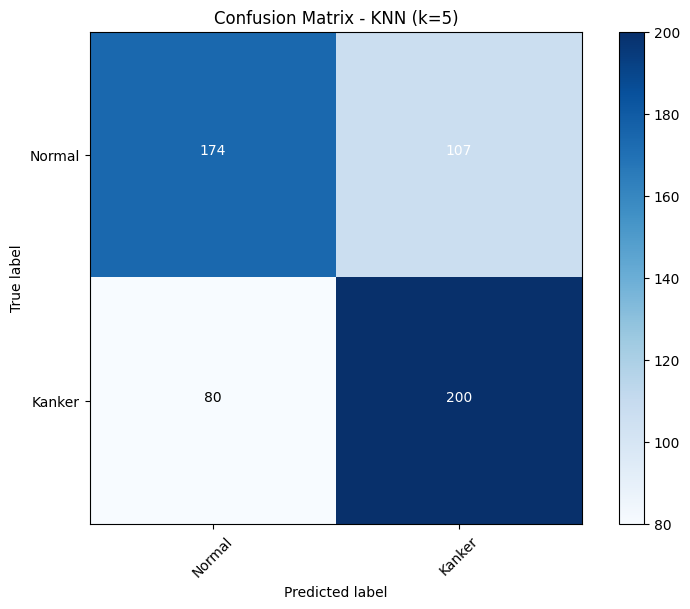

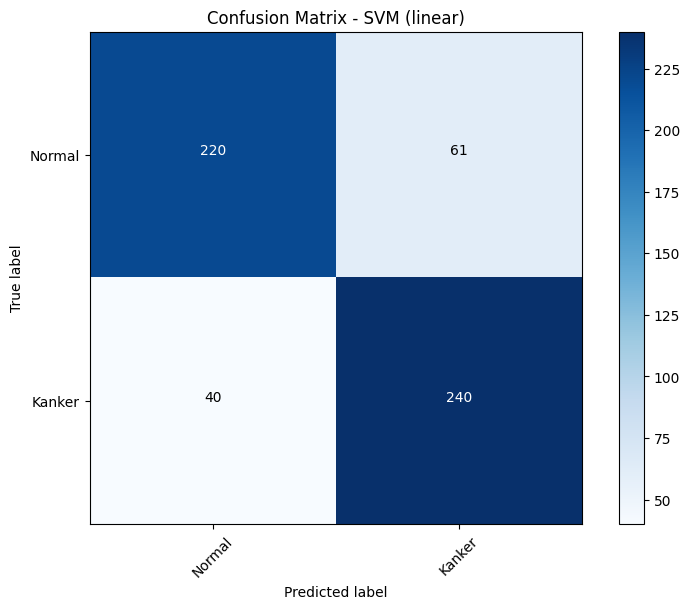

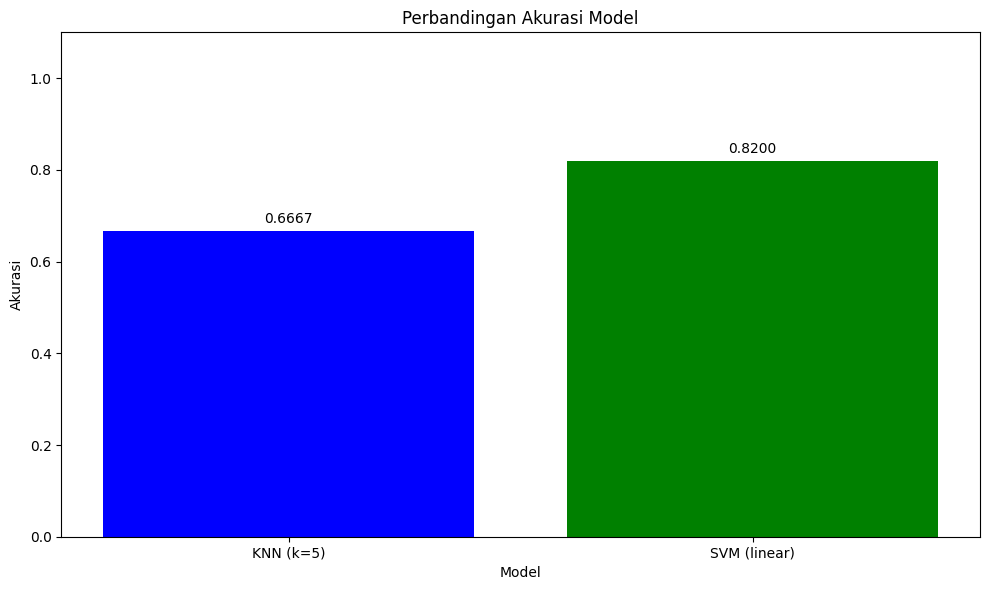

In [ ]:
def evaluate_model(model, X_test, y_test, model_name="Model"):
    """
    Evaluasi model.

    Args:
        model: Model yang akan dievaluasi
        X_test: Fitur testing
        y_test: Label testing
        model_name: Nama model untuk output

    Returns:
        Dictionary berisi metrik evaluasi
    """
    # Prediksi
    y_pred = model.predict(X_test)

    # Hitung metrik
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)

    # Probabilitas prediksi (untuk ROC curve)
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test)
        if y_prob.shape[1] > 1:
            y_prob = y_prob[:, 1]
    else:
        y_prob = None

    # Tampilkan hasil
    print(f"=== {model_name} Evaluation ===")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"Confusion Matrix:")
    print(cm)

    return {
        'model_name': model_name,
        'accuracy': accuracy,
        'report': report,
        'confusion_matrix': cm,
        'y_true': y_test,
        'y_pred': y_pred,
        'y_prob': y_prob
    }

def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    Plot confusion matrix.

    Args:
        cm: Confusion matrix
        classes: Label kelas
        title: Judul plot
        cmap: Colormap
    """
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Tambahkan nilai di setiap sel
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    return plt

# Evaluasi model terbaik
if 'best_knn_model' in locals() and 'best_svm_model' in locals():
    # Evaluasi KNN
    knn_eval = evaluate_model(best_knn_model, X_test, y_test, model_name=f"KNN (k={best_k})")

    # Evaluasi SVM
    svm_eval = evaluate_model(best_svm_model, X_test, y_test, model_name=f"SVM ({best_kernel})")

    # Plot confusion matrix
    class_names = ['Normal', 'Kanker']

    # KNN confusion matrix
    plt_knn = plot_confusion_matrix(knn_eval['confusion_matrix'], classes=class_names,
                                   title=f"Confusion Matrix - KNN (k={best_k})")
    plt_knn.show()

    # SVM confusion matrix
    plt_svm = plot_confusion_matrix(svm_eval['confusion_matrix'], classes=class_names,
                                   title=f"Confusion Matrix - SVM ({best_kernel})")
    plt_svm.show()

    # Perbandingan model
    eval_results = [knn_eval, svm_eval]

    # Plot perbandingan akurasi
    model_names = [result['model_name'] for result in eval_results]
    accuracies = [result['accuracy'] for result in eval_results]

    plt.figure(figsize=(10, 6))
    bars = plt.bar(model_names, accuracies, color=['blue', 'green'])

    # Tambahkan nilai di atas bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                 f'{height:.4f}', ha='center', va='bottom')

    plt.ylim(0, 1.1)
    plt.title("Perbandingan Akurasi Model")
    plt.xlabel("Model")
    plt.ylabel("Akurasi")
    plt.tight_layout()
    plt.show()
else:
    print("Models not available for evaluation.")